In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
plt.style.use("default")

from sklearn.model_selection import train_test_split

In [6]:
x = np.linspace(-10, 10, 100)

In [10]:

!conda --version


/bin/bash: line 1: conda: command not found


In [11]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:14
🔁 Restarting kernel...


In [2]:
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [12]:
!which conda


/usr/local/bin/conda


In [15]:
!conda init


no change     /usr/local/condabin/conda
no change     /usr/local/bin/conda
no change     /usr/local/bin/conda-env
no change     /usr/local/bin/activate
no change     /usr/local/bin/deactivate
no change     /usr/local/etc/profile.d/conda.sh
no change     /usr/local/etc/fish/conf.d/conda.fish
no change     /usr/local/shell/condabin/Conda.psm1
no change     /usr/local/shell/condabin/conda-hook.ps1
no change     /usr/local/lib/python3.10/site-packages/xontrib/conda.xsh
no change     /usr/local/etc/profile.d/conda.csh
no change     /root/.bashrc
No action taken.


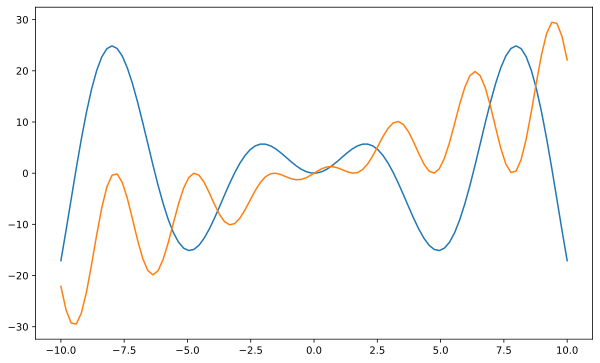

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(x, np.sin(x)*x*np.pi)
plt.plot(x, np.cos(x)*np.cos(x)*x*np.pi)
plt.show();

In [8]:
n_per_clust = 200

th = np.linspace(0, 4*np.pi, n_per_clust)

#radios respecto al origen de cada clase
r1 = 10
r2 = 15

#genereamos los datos de cada clúster
a = [r1*np.cos(th) + np.random.randn(n_per_clust)*3, #coseno de theta + ruido
    r1*np.sin(th) + np.random.rand(n_per_clust)]

b = [r2*np.cos(th) + np.random.rand(n_per_clust),
    r2*np.sin(th) + np.random.randn(n_per_clust)*3]

#etiquetas
labels_np = np.vstack((np.zeros((n_per_clust, 1)), np.ones((n_per_clust, 1))))
#vector columna de 0s para categoría A y 1s para B

#concatenar los dos objetos (cada uno es una lista de 2 vectores) en una matrix
data_np = np.hstack((a,b)).T

#convertimos a objetos de pytorch
X = torch.tensor(data_np).float()
y = torch.tensor(labels_np).float()

# X, y = data_np, labels_np

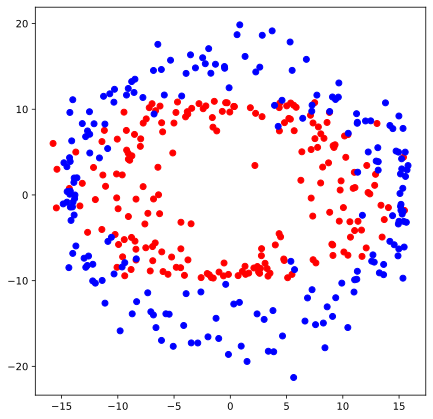

In [9]:
fig = plt.figure(figsize=(7,7))
plt.scatter(X[np.where(y==0)[0], 0], X[np.where(y==0)[0], 1], color="red")
plt.scatter(X[np.where(y==1)[0], 0], X[np.where(y==1)[0], 1], color="blue");

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)

In [ ]:
batch_size = 16 #suelen ser potencias de 2

train_loader = DataLoader(train_data,
                         batch_size=batch_size,
                         shuffle=True)

test_loader = DataLoader(test_data,
                        batch_size=test_data.tensors[0].shape[0])
#train_data.tensors[0] accede a las características X
#para predicciones del modelo, los lotes son individuales

In [ ]:
class Model(nn.Module):

    def __init__(self):

        super().__init__()

        self.inp = nn.Linear(train_data.tensors[0].shape[1], 128)
        self.hid = nn.Linear(128,128)
        self.out = nn.Linear(128,1)


        #el atributo referente a la proporción de dropout
        self.dr = dropout_rate

    def forward(self, x):

        x = F.relu(self.inp(x))

        x = F.relu(self.hid(x))

        x = self.out(x)

        return x

In [ ]:
model = Model()
loss_func = nn.BCEWithLogitsLoss()
optim = torch.optim.SGD(params=model.parameters(),
                   lr=0.01)

NameError: ignored

In [ ]:
def make_pred():

    x_min, x_max = X[:, 0].min() - 0.1, X[:,0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100), np.linspace(y_min, y_max, 100))

    x_in = np.c_[xx.ravel(), yy.ravel()]

    x_in = torch.tensor(np.array([x_in])).float()

    return F.sigmoid(model(x_in))

In [ ]:
n_epochs = 100

In [ ]:
train_accs = []
test_accs = []
predictions = torch.zeros((n_epochs, 10000, 1))

for epoch in range(n_epochs):


    batch_accs = []

    for (X_batch, y_batch) in train_loader:


        y_hat = model(X_batch)

        loss = loss_func(y_hat, y_batch)

        optim.zero_grad()
        loss.backward()
        optim.step()


        batch_accs.append(100*torch.mean(((y_hat>0) == y_batch).float()).item())

    predictions[epoch] = make_pred()

    train_accs.append(np.mean(batch_accs))

    X_test, y_test = next(iter(test_loader)) #extraemos los datos del generador
    preds = model(X_test)
    test_accs.append(100*torch.mean(((preds>0) == y_test).float()).item())

In [ ]:
import matplotlib.animation as animation

NameError: ignored

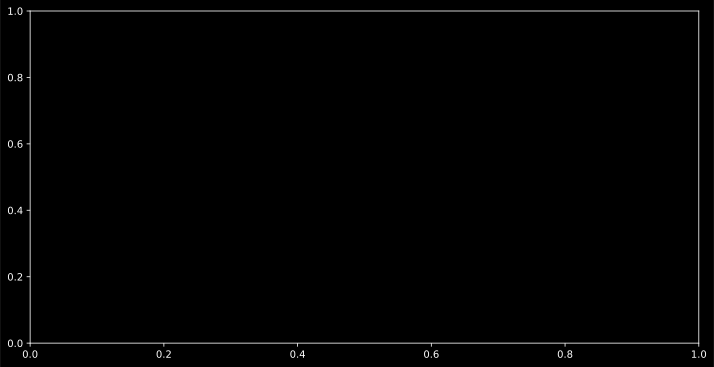

In [ ]:
fig, ax = plt.subplots(figsize=(12,6), dpi=100)

x_min, x_max = X[:, 0].min() - 0.1, X[:,0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100), np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

x_in = torch.tensor(np.array([x_in])).float()

# y_pred = F.sigmoid(model(x_in))
y_pred = predictions[0]

y_pred = np.round(y_pred.detach()).reshape(xx.shape)
# plt.figure(figsize=(15,7));
im = axs[0].contourf(xx, yy, y_pred, cmap="rainbow", alpha=0.7 ); #rainbow / cmap=plt.cm.binary_r
axs[0].scatter(X[:,0], X[:, 1], c=y, s=40, cmap="rainbow"); #rainbow / cmap="Paired"
axs[0].set_xlim(xx.min(), xx.max());
axs[0].set_ylim(yy.min(), yy.max());
axs[0].set_title("Decission Boundary", fontweight="bold")
# axs[1].set_colorbar(shrink=0.5);
fig.colorbar(im, ax=axs[0], shrink=0.5)
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.close()


title = ax.set_title('', fontweight="bold")

def drawframe(epoch):
    title.set_text('Epoch={0:4d}'.format(epoch))

    x_min, x_max = X[:, 0].min() - 0.1, X[:,0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100), np.linspace(y_min, y_max, 100))

    x_in = np.c_[xx.ravel(), yy.ravel()]

    x_in = torch.tensor(np.array([x_in])).float()

    # y_pred = F.sigmoid(model(x_in))
    y_pred = predictions[epoch]

    y_pred = np.round(y_pred.detach()).reshape(xx.shape)
    # plt.figure(figsize=(15,7));
    im = axs[0].contourf(xx, yy, y_pred, cmap="rainbow", alpha=0.7 ); #rainbow / cmap=plt.cm.binary_r
    axs[0].scatter(X[:,0], X[:, 1], c=y, s=40, cmap="rainbow"); #rainbow / cmap="Paired"
    axs[0].set_xlim(xx.min(), xx.max());
    axs[0].set_ylim(yy.min(), yy.max());
    axs[0].set_title("Decission Boundary", fontweight="bold")
    # axs[1].set_colorbar(shrink=0.5);
    fig.colorbar(im, ax=axs[0], shrink=0.5)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)

    return axs

    # blit=True re-draws only the parts that have changed.

anim = animation.FuncAnimation(fig, drawframe, frames=n_epochs, repeat=False, interval=500, blit=True)


writer = animation.PillowWriter(fps=30,
                                metadata=dict(artist='Me'),
                                bitrate=1800)
    # ani.save('gradient1D.gif', writer=writer)
    # from IPython.display import HTML
    # HTML(anim.to_html5_video())

In [ ]:
from IPython.display import HTML
HTML(anim.to_html5_video())